In [21]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [22]:
ts = pd.Series(np.random.randn(20) + 10, pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift()

In [23]:
ts.head()

2016-07-01     9.773431
2016-07-02    10.665026
2016-07-03    10.148281
2016-07-04    11.730071
2016-07-05     9.609587
Freq: D, dtype: float64

In [24]:
ts_lagged.head()

2016-07-01          NaN
2016-07-02     9.773431
2016-07-03    10.665026
2016-07-04    10.148281
2016-07-05    11.730071
Freq: D, dtype: float64

In [25]:
ts.diff()

2016-07-01         NaN
2016-07-02    0.891595
2016-07-03   -0.516745
2016-07-04    1.581790
2016-07-05   -2.120484
2016-07-06    1.497546
2016-07-07   -0.806833
2016-07-08   -1.804385
2016-07-09    1.304917
2016-07-10    0.634382
2016-07-11   -0.897430
2016-07-12    1.809127
2016-07-13    0.291379
2016-07-14   -4.243520
2016-07-15    1.739991
2016-07-16    2.953232
2016-07-17   -0.530679
2016-07-18    0.568976
2016-07-19   -1.461933
2016-07-20    0.392250
Freq: D, dtype: float64

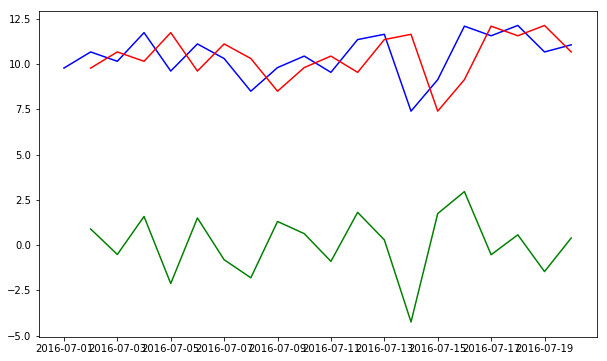

In [26]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')
plt.plot(ts - ts_lagged, color = 'green')

### But the need to difference is quite common, so Pandas does it for you

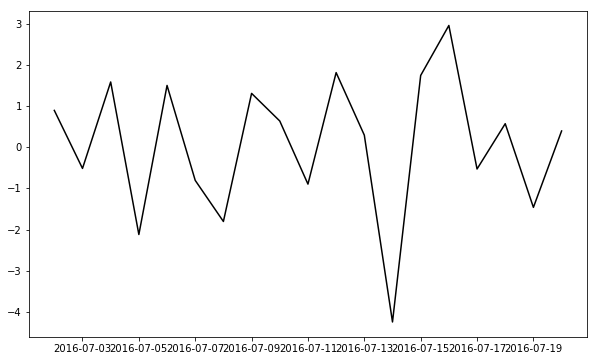

In [27]:
plt.plot(ts.diff(), color = 'black')

### Query: how can I shift my time series 'into the future' instead of into the past?

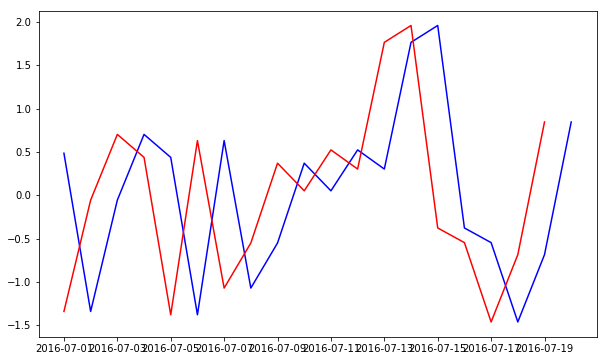

In [41]:
# %load snippets/shift_future.py
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift(-1)
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

# Window functions give you moving aggregate measures of a time series

In [29]:
# Window functions are like aggregation/summary functions
# You can use them in conjunction with .resample()

In [30]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [31]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

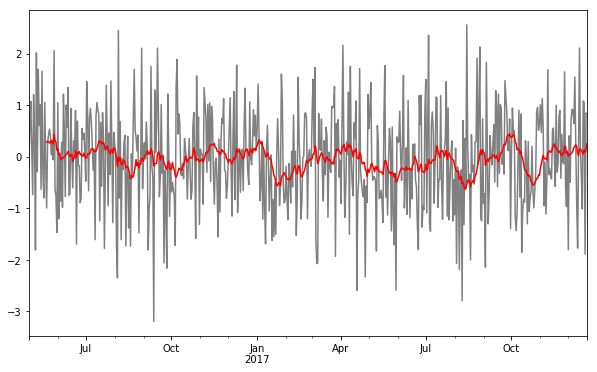

In [32]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

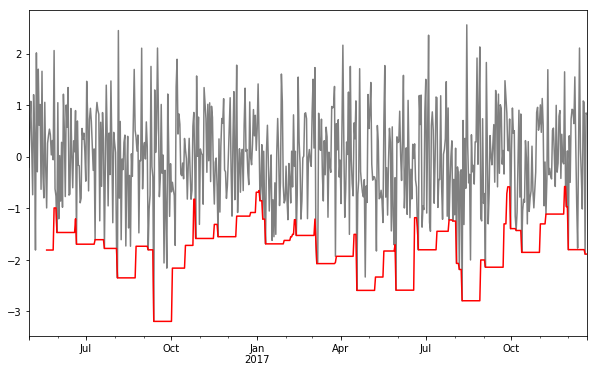

In [33]:
df['A'].plot(color = 'gray')
r.min()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

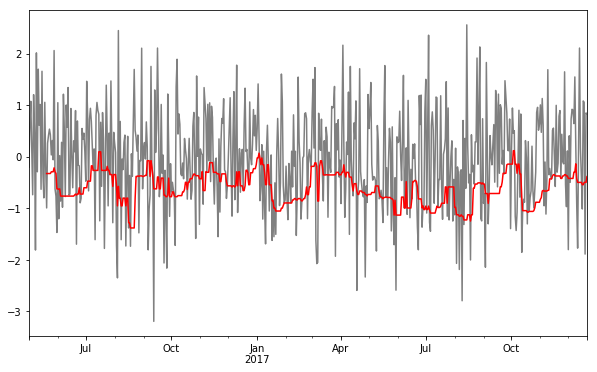

In [34]:
df['A'].plot(color = 'gray')
r.quantile(.30)['A'].plot(color = 'red')

### What about a custom function?

In [43]:
# %load snippets/custom_rolling.py
df.rolling(window = 10, center = False).apply(lambda x: x[1]/x[2])[1:10]

,A,B,C
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,0.5649,-0.007738,0.750098


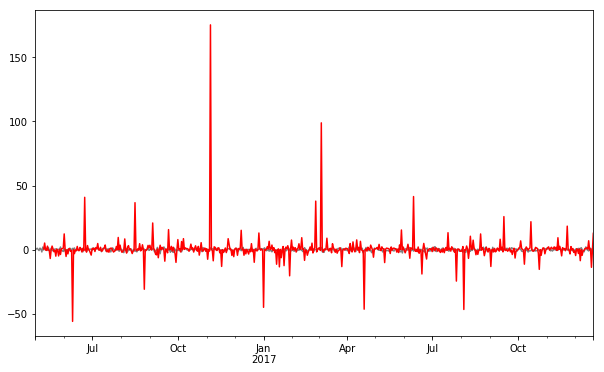

In [45]:
# %load snippets/custom_rolling2.py
df['A'].plot(color = 'gray')
df.rolling(window = 10, center = False)['A'].apply(lambda x: x[1]/x[2]).plot(color = 'red')


## Expanding windows

In [37]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.202326,-0.627630,0.234200
2016-05-03,0.493057,-1.342470,-0.028533
2016-05-04,0.422055,-0.550695,0.023341
2016-05-05,0.190217,-0.528388,0.098849


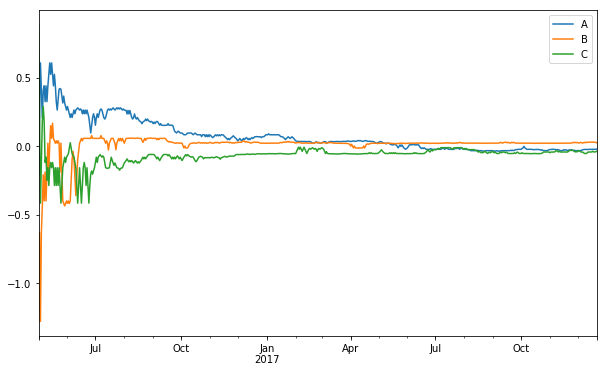

In [38]:
df.expanding(min_periods = 1).median().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [ ]:
# %load snippets/window_funcs_try.py
#1
ts = pd.Series(np.random.randn(1000), index = pd.date_range(start = '1/1/16', periods = 1000, freq = 'D'))
ts.ewm(span = 60, freq = 'D', min_periods = 0, adjust = True).mean().plot()
ts.rolling(window = 60).mean().plot()

#2 
# To get a more reliable statistic if it makes logical sense

#3
r = df.rolling(window = 20)
r.apply(lambda x: sorted(x)[round(len(x)*.5)])

#4
r = df.rolling(window = 20)
r.agg(['sum', 'mean']).head(30)
